<a href="https://colab.research.google.com/github/NoahGV/AA_PRACTICA3_GRUPO_B5/blob/main/PR%C3%81CTICA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA 3: REDES DE NEURONAS CONVOLUCIONALES**

# GRUPO 5: Jonás García Vallejo, Lydia Sánchez-Cano Sánchez y Noah García Villanueva

#**ENUNCIADO**

Crea un modelo de Red de Neuronas Convolucionales que sea capaz de reconocer y
clasificar imágenes en 100 categorías. Este modelo será definido, configurado,
entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.

Para ello tendréis que crear un modelo en Keras aplicando de una tirada todos los pasos
al conjunto de datos CIFAR-100 dataset, que os podréis descargar.

Este conjunto de datos tiene 100 clases que contienen 600 imágenes cada una. Hay 500
imágenes de entrenamiento y 100 imágenes de prueba por clase. Las 100 clases del
CIFAR-100 se agrupan en 20 superclases. Cada imagen viene con una etiqueta "fina" (la
clase a la que pertenece) y una etiqueta "gruesa" (la superclase a la que pertenece).
Aquí está la lista de clases del CIFAR-100.):

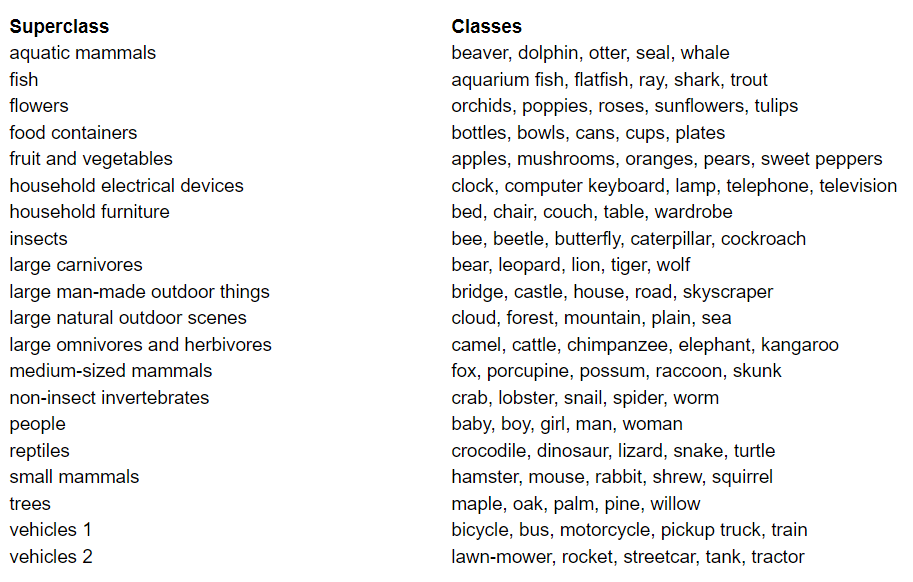

#**CUESTIONES PARA IMPLEMENTAR Y RESPONDER**

• Debéis decidir la estructura de red neuronal convolucional (número de
parámetros) y los valores de todos los hiperparámetros que pemitan tener la
mayor precisión posible en los datos de test.

• Explicar la salida de la llamada model.summary() de vuestra red definitiva.

• Seguir los modelos metodológicos vistos en clase (sobre un modelo base, ir
incrementando la complejidad para mejorar el modelo hasta donde se pueda

• Ver los conceptos de batch_normalization y dropout y ver si se podría mejorar
el modelo con ello.

• Ver los conceptos de callbacks (Decaimiento del ratio de aprendizaje) y ver si se
podría mejorar el modelo con ello.

#**SOLUCIÓN**

Importamos todas las librerías necesarias para resolver el ejercicio

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar100
11

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)#

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.14.0


Ahora importamos las librerías que nos ayudan a la construcción de las redes neuronales convolucionales


In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

##Creamos la arquitectura de la red convolucional

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(2,2), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
Total params: 896 (3.50 KB)
Trainable params: 896 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Creamos  un modelo secuencial para una pila lineal de capas, que se ejecutan de manera secuencial una tras otra.

- Añadimos una capa convolucional al modelo con 32 filtros de 3x3, utilizando un stride de 2 (tener un stride con valor mayor que uno,nos ayuda a reducir el número de capas) para reducir el tamaño espacial de la salida.

- La función de activación utilizada es la función ReLU (Rectified Linear Unit).

- La forma de entrada de esta capa se especifica como (32, 32, 3), lo que indica que se espera una entrada de imágenes de 32x32 píxeles con 3 canales de color (RGB).

- Se añade una capa de pooling (agrupación) con una ventana de pooling de 2x2. Así reducimos la dimensionalidad de las características y disminuimos la cantidad de parámetros en la red, ayudando así en la eficiencia computacional y previniendo el sobreajuste.

Por último, model.summary nos indica un resumen del modelo, mostrando la arquitectura de la red, el número de parámetros entrenables y no entrenables, y el tamaño de salida de cada capa.

Indicaremos como hallamos el número de parámetros entrenables y no entrenables y, además, el tamaño de salida de cada capa

**Tamaño de salida:**

- La primera capa convolucional (Conv2) tiene un tamaño de salida: (15,15,32) ya que presenta 32 filtros y el valor 15 viene de la operación: (32-3)/2 que da una aproximación a 15.

- Para la capa Pooling, la salida es: (7,7,32), siguen siendo 32 filtros y el número 7 viene dada de la operación ((32-3)/2)/2 que da una aproximación a 7.

**Parámetros entrenables y no entrenables**

- Para la capa convolucional tenemos 896 parámetros entrenables, este número se debe a a siguiente operación:

Número de parámetros entrenables = ( Tamaño del filtro * Tamaño del filtro de entrada * Número de canales de entrada + 1 ) * Número de filtros

( 3 * 3 * 3 +1 ) * 32 = 896 parámetros entrewnables

- En la capa Pooling no hay parámetros entrenables, ya que utilizamos max pooling por lo tanto no aprende ningún parámetro entrenable

Metemos otra capa Convolución y otra Pooling

In [4]:
model.add(Conv2D(64, (3, 3), strides=(2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                            
                                                                 
Total params: 19392 (75.75 KB)
Trainable params: 19392 (75.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Se realizan las mismas operaciones mencinadas anteriormente:

**Tamaño de salida:**

- Conv2: (4,4,64), 64 filtros y 7/2 +1 = 4

- Pooling= 4/2 = 2 y 64 filtros

**Parámetros entrenables y no entrenables:**

- Conv2:(3 * 3 * 32 + 1) * 64 = 18496

-Pooling, al ser max-pooling no aprende ningún parámetro entrenable

En total, 896 + 18.496 = 19.392

In [5]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model.add(Flatten())
model.add(Dense(100, activation='softmax'))  # Ajusta el número de neuronas según el número de clases (100 en CIFAR-100)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 100)               2

La capa Fltten() convierte la salida tridimensional de la capa convolucional/pooling anterior en una forma aplanada unidimensional. Además, no tiene parámetros entrenables.

La capa Dense() da el número de neuronas, 100, que se ajusta según el número de clases en tu conjunto de datos.

**El tamaño de salida:**  


- Faltten():  depende del tamaño de la entrada, que en este caso sería  2 * 2 * 64 = 256

-Dense(): es 100

**Parámetros entrenables:**

- Dense(): ( 256 + 1 ) * 100 = 25.700

- Total parámetros entrenables: 896 + 18.496 + 25.700 = 45.092

##CIFAR-100 dataset



Ahora implementamos nuestro el Dataset con el que vamos a entrenar el modelo.

In [6]:
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Cargar datos

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()



print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

169001437/169001437 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


Eliminaremos los duplicados, es decir, imágenes duplicadas.

In [7]:
# Convert images to 1D arrays for demonstration purposes
train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))
# Convert to Pandas DataFrames
df_train_images = pd.DataFrame(train_images_flat)
df_test_images = pd.DataFrame(test_images_flat)
df_train_labels = pd.DataFrame(train_labels, columns=['Label'])
df_test_labels = pd.DataFrame(test_labels, columns=['Label'])
# Check for duplicate rows
duplicates_train_images = df_train_images.duplicated()
duplicates_test_images = df_test_images.duplicated()
duplicates_train_labels = df_train_labels.duplicated()
duplicates_test_labels = df_test_labels.duplicated()

Normalizamos nuestros datos.

In [8]:
# Preprocesamiento de datos
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels, num_classes=100)
test_labels = to_categorical(test_labels, num_classes=100)

print (train_images.shape)
print (train_labels.shape)

(50000, 32, 32, 3)
(50000, 100)


Compilamos y entrenamos nuestro modelo.

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=64,
          epochs=5,
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
782/782 [==============================] - 15s 18ms/step - loss: 4.6035 - accuracy: 0.0097
Epoch 2/5
782/782 [==============================] - 14s 17ms/step - loss: 4.5895 - accuracy: 0.0133
Epoch 3/5
782/782 [==============================] - 13s 16ms/step - loss: 4.5574 - accuracy: 0.0229
Epoch 4/5
782/782 [==============================] - 13s 16ms/step - loss: 4.4481 - accuracy: 0.0356
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 4.2273 - accuracy: 0.0633
Test accuracy: 0.0632999986410141


**Compilamos modelo:**

- Loss (función de pérdida): Utilizamos la función de pérdida categórica entropía cruzada. Esta función de pérdida es comúnmente utilizada para problemas de clasificación con varias clases.


- Optimizer (optimizador): Stochastic Gradient Descent (SGD). SGD es un optimizador clásico para la optimización de redes neuronales.


- Metrics (métricas): La métrica utilizada para evaluar el rendimiento del modelo durante el entrenamiento y la evaluación es la precisión (accuracy).

**Entrenamos modelo:**

- train_images: Conjunto de imágenes de entrenamiento.


- train_labels: Etiquetas correspondientes a las imágenes de entrenamiento.


- batch_size: Tamaño del lote utilizado para el entrenamiento. En cada iteración, el modelo se entrena en un lote de 64 ejemplos.


- epochs: Número de épocas de entrenamiento. El modelo se entrena a través de todos los datos de entrenamiento durante 5 épocas.


- verbose: Muestra información detallada durante el entrenamiento (1 indica que se muestre, 0 indica que no).

**Evaluación del modelo con datos de prueba:**

- test_images: Conjunto de imágenes de prueba.


- test_labels: Etiquetas correspondientes a las imágenes de prueba.


- La función evaluate se utiliza para evaluar el rendimiento del modelo en el conjunto de datos de prueba.


- Se imprime la precisión (accuracy) del modelo en el conjunto de datos de prueba.

En este primer modelo, obtenemos un 0.0529 de accuracy.

Un accuracy de 0.0529 significa que el 5.29% de las predicciones realizadas por tu modelo son correctas. Es un valor bastante bajo y sugiere que el modelo no está funcionando bien en el conjunto de datos evaluado.

#**Cómo mejorar el modelo anterior**



- Aumentar la Complejidad del Modelo:




Considera añadir más capas convolucionales y aumentar el número de filtros en cada capa. Esto puede ayudar al modelo a aprender características jerárquicas más complejas.


- Utilizar Normalización por Lotes:


Agrega capas de normalización por lotes (Batch Normalization) después de las capas convolucionales. Esto puede ayudar a estabilizar y acelerar el proceso de entrenamiento.


- Ajustar la Estrategia de Pooling:


Experimenta con diferentes estrategias de pooling. Actualmente estás utilizando max pooling; intenta average pooling o una combinación de ambos para ver si mejora el rendimiento.


- Ajustar la Tasa de Aprendizaje:


Experimenta con diferentes tasas de aprendizaje para el optimizador. Actualmente estás utilizando SGD; considera probar otros optimizadores como Adam o RMSprop con diferentes tasas de aprendizaje.


- Programa de Tasa de Aprendizaje:


Implementa un programa de tasa de aprendizaje. Esto se puede usar para disminuir gradualmente la tasa de aprendizaje durante el entrenamiento, lo que puede ayudar en la convergencia.


- Aumento de Datos:


Aplica aumento de datos durante el entrenamiento. Esto implica aplicar transformaciones aleatorias (como rotación, zoom, volteo) a las imágenes de entrenamiento. Esto puede ayudar a mejorar la generalización del modelo.


- Regularización:


Añade capas de dropout para prevenir el sobreajuste. Las capas de dropout desactivan aleatoriamente una fracción de las neuronas durante el entrenamiento, lo que puede mejorar la capacidad del modelo para generalizar.


- Detención Temprana:


Implementa la detención temprana durante el entrenamiento. Monitoriza la pérdida de validación y detén el entrenamiento cuando deje de mejorar. Esto ayuda a prevenir el sobreajuste.

# **1º Modelo mejorado**

En este modelo utilizaremos el Dropout, BatchNormalization y el optimizador Adam para mejorar el modelo anterior. Además, añadiremos más épocas cuando entrenemos el modelo.

Para ello importamos las herramientas necesarias.

In [10]:
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), strides=(2,2), activation='relu', input_shape=(32, 32, 3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(64, (3, 3), strides=(2, 2), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))

model1.add(Flatten())
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(100, activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 15, 15, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 15, 15, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 batch_normalization_1 (Bat  (None, 4, 4, 64)          256       
 chNormalization)                                                
                                                      

Primero, echemos un vistazo a cada capa en tu modelo model1:

-  Capa Conv2D (1):


    Filtros: 32
    Tamaño del kernel: (3, 3)
    Strides: (2, 2)
    Función de activación: 'relu'
    Tamaño de entrada: (32, 32, 3)


- Capa BatchNormalization (2, 5, 7):



Sin parámetros entrenables (no afecta el número total de parámetros, pero es importante para la estabilidad del entrenamiento).


- Capa MaxPooling2D (3, 6):


    Tamaño del pool: (2, 2)


- Capa Conv2D (4):


    Filtros: 64
    Tamaño del kernel: (3, 3)
    Strides: (2, 2)
    Función de activación: 'relu'
    Padding: 'same'


- Capa Flatten (8):

Transforma los datos a un vector unidimensional.


- Capa Dropout (9):

    Probabilidad de dropout: 0.5


- Capa Dense (10):

    Neuronas: 100
    Función de activación: 'softmax'

Vamos a calcular los parámetros.

- Capa Conv2D (1):

    Parámetros = ((3 * 3) * 32 + 1) * 3 = 896
- Capa Conv2D (4):

    Parámetros = ((3 * 3) * 64 + 1) * 32 = 18496

In [12]:
# Compilar el modelo
model1.compile(loss='categorical_crossentropy',
                       optimizer=Adam(learning_rate=0.001),
                       metrics=['accuracy'])

# Entrenar el modelo
History_model1 = model1.fit(train_images, train_labels, batch_size=64,
                   epochs=25,
                   validation_data=(test_images, test_labels),
                   verbose=1)

# Evaluar el modelo
puntuacion_prueba, precision_prueba = model1.evaluate(test_images, test_labels)
print('Precisión en la prueba:', precision_prueba)

Epoch 1/25
782/782 [==============================] - 23s 28ms/step - loss: 4.2546 - accuracy: 0.0868 - val_loss: 3.5517 - val_accuracy: 0.1746
Epoch 2/25
782/782 [==============================] - 22s 29ms/step - loss: 3.5479 - accuracy: 0.1711 - val_loss: 3.2064 - val_accuracy: 0.2401
Epoch 3/25
782/782 [==============================] - 20s 26ms/step - loss: 3.2828 - accuracy: 0.2133 - val_loss: 3.1619 - val_accuracy: 0.2395
Epoch 4/25
782/782 [==============================] - 20s 26ms/step - loss: 3.1205 - accuracy: 0.2449 - val_loss: 3.0349 - val_accuracy: 0.2683
Epoch 5/25
782/782 [==============================] - 22s 28ms/step - loss: 3.0297 - accuracy: 0.2631 - val_loss: 2.9496 - val_accuracy: 0.2831
Epoch 6/25
782/782 [==============================] - 20s 26ms/step - loss: 2.9558 - accuracy: 0.2742 - val_loss: 2.8275 - val_accuracy: 0.3082
Epoch 7/25
782/782 [==============================] - 22s 28ms/step - loss: 2.9033 - accuracy: 0.2865 - val_loss: 2.7886 - val_accuracy:

Nuestro primer modelo mejorado ha alcanzado una precisión de 0.3310, un accuracy mayor que el anterior pero bajo en un modelo que solo predice el 33,10% de las imagenes bien.

A continuación una representación gráfica de la arquitectura del modelo:

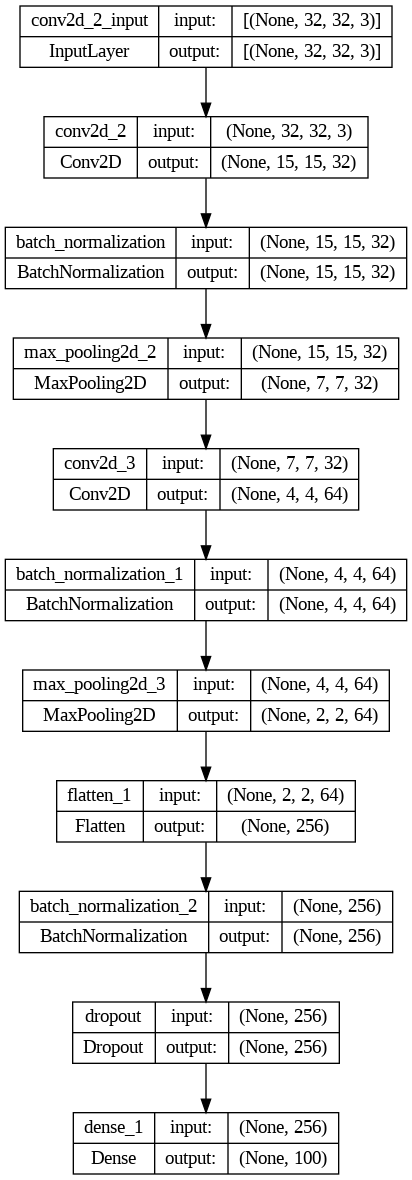

In [13]:
from tensorflow.keras.utils import plot_model


plot_model(model1, to_file='model1_architecture.png', show_shapes=True, show_layer_names=True)


313/313 [==============================] - 2s 5ms/step


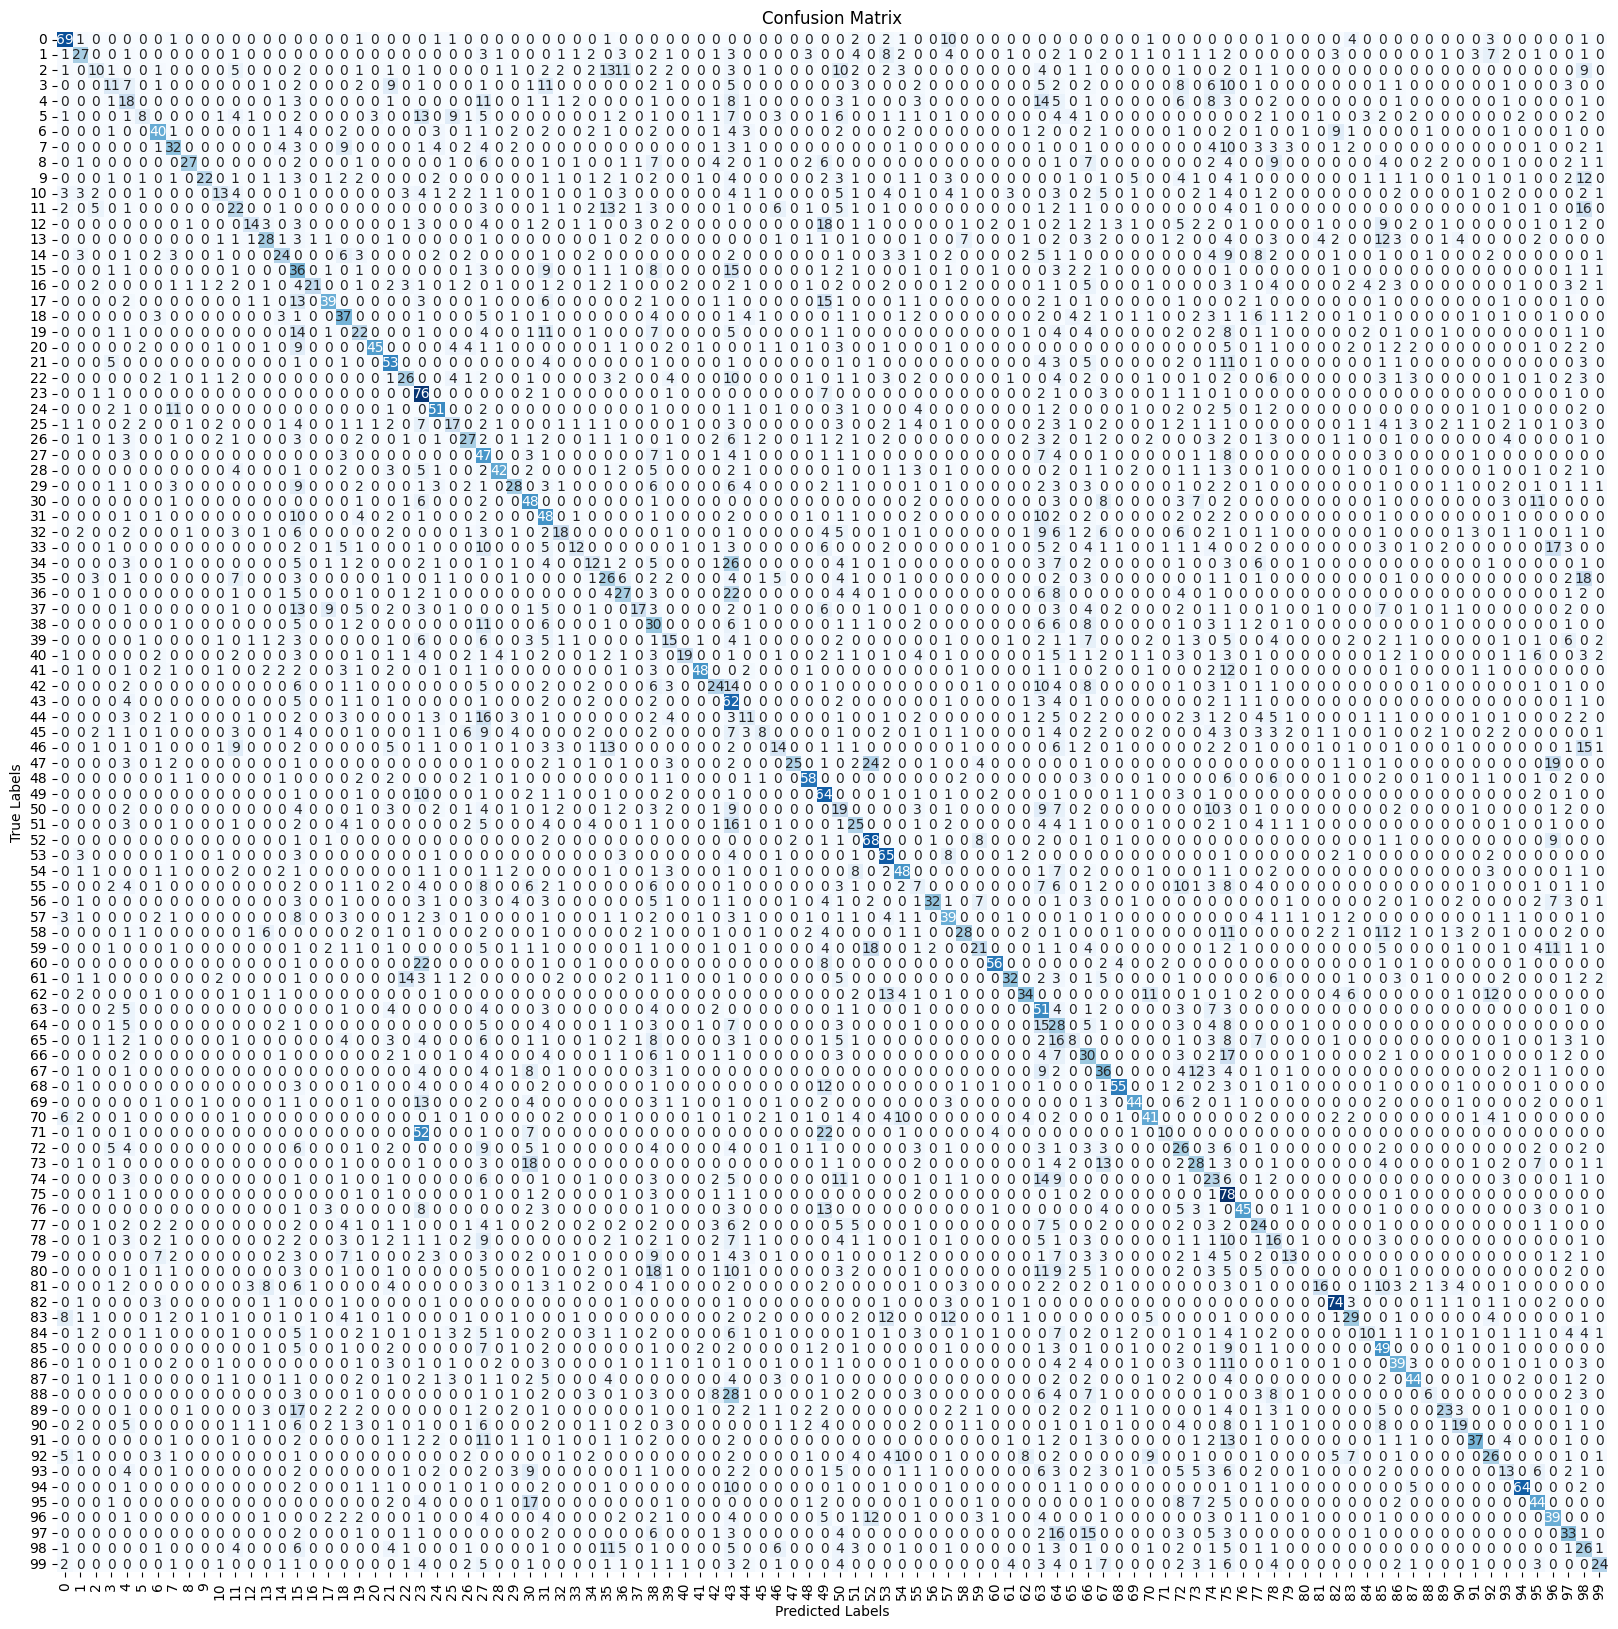

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Para cada modelo, reemplaza 'modelX' con tu modelo correspondiente (model, model1, model2, etc.)
predictions = model1.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(20, 20))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


 La matriz de confusión es una herramienta útil para evaluar el rendimiento de un modelo de clasificación. Te proporciona información sobre cuántas instancias de cada clase se clasificaron correctamente o incorrectamente por el modelo.

 Analizamos los resultados de la siguiente forma:


- Diagonal principal:

  Los elementos en la diagonal principal representan las predicciones correctas. Cuanto más grande sea cada número en la diagonal, mejor es el rendimiento del modelo.


- Otros elementos:

  Los elementos fuera de la diagonal principal representan las predicciones incorrectas. Puedes analizar en qué clases específicas el modelo tiende a confundirse.

- Análisis de la escala de colores:

  La escala de colores (en este caso, azul claro a azul oscuro) te ayuda a visualizar la distribución de las predicciones. Cuanto más oscuro sea el color, mayor será el número de predicciones en esa celda.

Por ejemplo, la imagen 54 se predice muy bien.

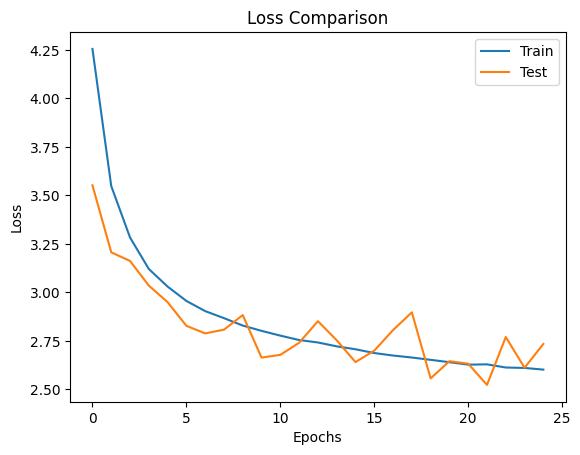

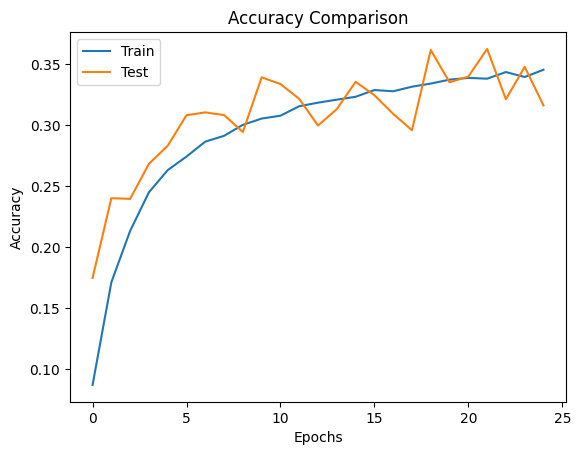

In [15]:
import matplotlib.pyplot as plt


# Graficar pérdida
plt.plot(History_model1.history['loss'], label='Train')
plt.plot(History_model1.history['val_loss'], label='Test')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Graficar precisión
plt.plot(History_model1.history['accuracy'], label='Train')
plt.plot(History_model1.history['val_accuracy'], label='Test')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- Gráfica pérdida:


    plt.plot(History_model1.history['loss'], label='Train'): Grafica la pérdida en el conjunto de entrenamiento (Train) a lo largo de las épocas.
    plt.plot(History_model1.history['val_loss'], label='Test'): Grafica la pérdida en el conjunto de validación (Test) a lo largo de las épocas.
    plt.title('Loss Comparison'): Establece el título del gráfico como "Loss Comparison".
    plt.xlabel('Epochs'): Etiqueta el eje x como "Epochs" (épocas).
    plt.ylabel('Loss'): Etiqueta el eje y como "Loss" (pérdida).
    plt.legend(): Muestra la leyenda para indicar qué línea corresponde a qué conjunto.
    plt.show(): Muestra el gráfico.


- Gráfica precisión:


    plt.plot(History_model1.history['accuracy'], label='Train'): Grafica la precisión en el conjunto de entrenamiento (Train) a lo largo de las épocas.
    plt.plot(History_model1.history['val_accuracy'], label='Test'): Grafica la precisión en el conjunto de validación (Test) a lo largo de las épocas.
    plt.title('Accuracy Comparison'): Establece el título del gráfico como "Accuracy Comparison".
    plt.xlabel('Epochs'): Etiqueta el eje x como "Epochs" (épocas).
    plt.ylabel('Accuracy'): Etiqueta el eje y como "Accuracy" (precisión).
    plt.legend(): Muestra la leyenda para indicar qué línea corresponde a qué conjunto.
    plt.show(): Muestra el gráfico.

Gracias a estas gráficas puedes evaluar cómo evolucionan la pérdida y la precisión a medida que el modelo se entrena. Puedes analizar si el modelo está convergiendo, si hay sobreajuste (overfitting), o si es necesario ajustar parámetros como la tasa de aprendizaje.

# **2º Modelo Mejorado**

En este modelo cambiaremos el número de filtros de nuestra red, aumentandola, para que sea capaz de identificar características con mayor detalle. Mantendremos el Dropout y el BatchNormalization.

Cambiaremos el optimizador a SGD con una tasa de apredizaje de 0.01 y un momento de 0.9, ya que  SGD puede tener un mejor rendimiento, especialmente con una tasa de aprendizaje adecuada y un buen momento.

Una tasa de aprendizaje más baja puede ayudar a mejorar la estabilidad del entrenamiento y evitar oscilaciones excesivas en la función de pérdida.


El momento ayuda a acelerar el entrenamiento y puede ayudar a superar los mínimos locales en la función de pérdida. Un valor de momento de 0.9 es relativamente alto y puede ayudar a suavizar el proceso de optimización.

Además, tendré un batch size de 128, significa que en cada iteración del proceso de entrenamiento, el modelo utilizará 128 ejemplos de entrenamiento para calcular el gradiente y ajustar los pesos del modelo. Estos 128 ejemplos se seleccionan aleatoriamente del conjunto de entrenamiento en cada iteración.

In [16]:
from tensorflow.keras.optimizers import SGD
# Modelo mejorado
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), strides=(2,2), activation='relu', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(128, (3, 3), strides=(2, 2), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(100, activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 15, 15, 64)        1792      
                                                                 
 batch_normalization_3 (Bat  (None, 15, 15, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 batch_normalization_4 (Bat  (None, 4, 4, 128)         512       
 chNormalization)                                                
                                                      

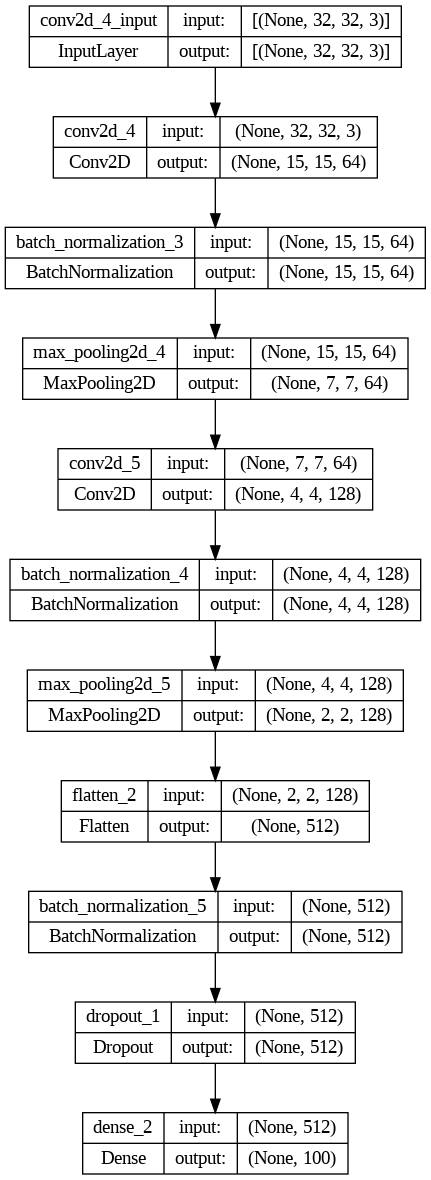

In [17]:
from tensorflow.keras.utils import plot_model

plot_model(model2, to_file='model2_architecture.png', show_shapes=True, show_layer_names=True)

In [18]:
# Compilar el modelo con SGD como optimizador
model2.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01, momentum=0.9),
              metrics=['accuracy'])

# Entrenar el modelo
History_model2 = model2.fit(train_images, train_labels, batch_size=128,
          epochs=20,
          validation_data=(test_images, test_labels),
          verbose=1)

# Evaluar el modelo
score, accuracy = model2.evaluate(test_images, test_labels)
print('Precisión en la prueba:', accuracy)

Epoch 1/20
391/391 [==============================] - 34s 86ms/step - loss: 3.9997 - accuracy: 0.1178 - val_loss: 3.5628 - val_accuracy: 0.1711
Epoch 2/20
391/391 [==============================] - 33s 84ms/step - loss: 3.3462 - accuracy: 0.2120 - val_loss: 3.3165 - val_accuracy: 0.2196
Epoch 3/20
391/391 [==============================] - 35s 89ms/step - loss: 3.0642 - accuracy: 0.2603 - val_loss: 3.0172 - val_accuracy: 0.2658
Epoch 4/20
391/391 [==============================] - 34s 87ms/step - loss: 2.8733 - accuracy: 0.2948 - val_loss: 3.0130 - val_accuracy: 0.2749
Epoch 5/20
391/391 [==============================] - 33s 84ms/step - loss: 2.7448 - accuracy: 0.3219 - val_loss: 3.0359 - val_accuracy: 0.2728
Epoch 6/20
391/391 [==============================] - 34s 87ms/step - loss: 2.6425 - accuracy: 0.3415 - val_loss: 3.3008 - val_accuracy: 0.2428
Epoch 7/20
391/391 [==============================] - 35s 89ms/step - loss: 2.5499 - accuracy: 0.3601 - val_loss: 2.6885 - val_accuracy:

La precisión de este nuevo modelo es de 0.3641, algo mejor que el anterior pero sigue siendo muy bajo.

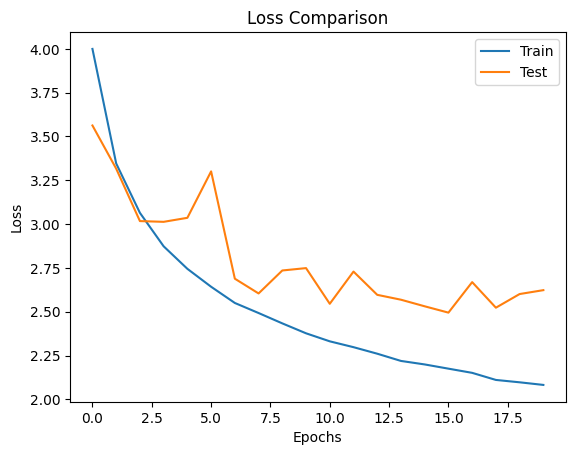

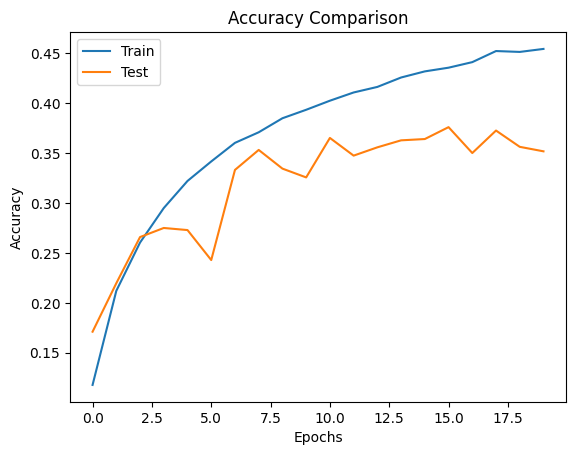

In [19]:
import matplotlib.pyplot as plt

# Graficar pérdida
plt.plot(History_model2.history['loss'], label='Train')
plt.plot(History_model2.history['val_loss'], label='Test')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Graficar precisión
plt.plot(History_model2.history['accuracy'], label='Train')
plt.plot(History_model2.history['val_accuracy'], label='Test')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Vemos que a partir de la tercera iteración hay sobreentrenamiento.

# **3º Modelo Mejorado**

La única diferencia con respecto al modelo anterior es que hemos agregado una técnica de regularización. Se trata de regularización L2, que añade un ciste añadido proporcional al cuadrado del valor de los coeficientes de peso o "weight decay".

La característica más interesante de la regularización L2 es la penalización de los pesos.

Penelización de los pesos: Añade una penalización y los pesos mas grandes penalizan más, lo cual evita que una característica individual domine el modelo, provocando la reducción de los pesos.




In [20]:
from tensorflow.keras.optimizers import SGD
from keras import regularizers
# Modelo mejorado
model3 = Sequential()

model3.add(Conv2D(64, (3, 3), strides=(2,2), activation='relu', input_shape=(32, 32, 3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(128, (3, 3), strides=(2, 2), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())
model3.add(BatchNormalization())
model3.add(Dropout(0.3))
model3.add(Dense(100, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        1792      
                                                                 
 batch_normalization_6 (Bat  (None, 15, 15, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 batch_normalization_7 (Bat  (None, 4, 4, 128)         512       
 chNormalization)                                                
                                                      

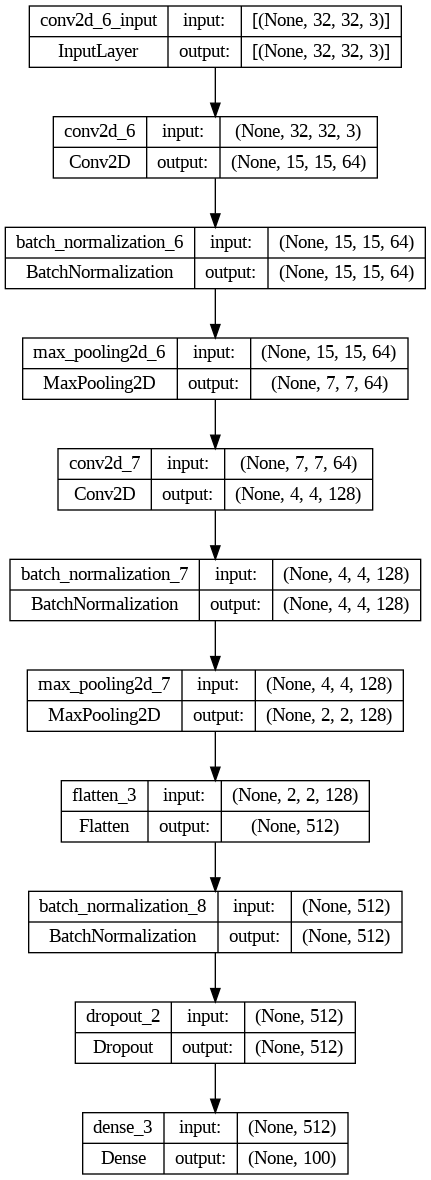

In [21]:
plot_model(model3, to_file='model3_architecture.png', show_shapes=True, show_layer_names=True)

In [22]:
# Compilar el modelo con SGD como optimizador
model3.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01, momentum=0.9),
              metrics=['accuracy'])

# Entrenar el modelo
history_model3 = model3.fit(train_images, train_labels, batch_size=128,
          epochs=5,
          validation_data=(test_images, test_labels),
          verbose=1)



Epoch 1/5
391/391 [==============================] - 37s 91ms/step - loss: 4.1664 - accuracy: 0.1170 - val_loss: 3.7617 - val_accuracy: 0.1570
Epoch 2/5
391/391 [==============================] - 33s 85ms/step - loss: 3.4523 - accuracy: 0.2128 - val_loss: 3.4467 - val_accuracy: 0.2218
Epoch 3/5
391/391 [==============================] - 33s 85ms/step - loss: 3.1576 - accuracy: 0.2635 - val_loss: 3.2844 - val_accuracy: 0.2436
Epoch 4/5
391/391 [==============================] - 34s 88ms/step - loss: 2.9711 - accuracy: 0.2963 - val_loss: 3.2095 - val_accuracy: 0.2503
Epoch 5/5
391/391 [==============================] - 35s 90ms/step - loss: 2.8432 - accuracy: 0.3247 - val_loss: 3.0022 - val_accuracy: 0.2932


In [23]:
# Evaluar el modelo
score, accuracy = model3.evaluate(test_images, test_labels)
print('Precisión en la prueba:', accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 3.0022 - accuracy: 0.2932
Precisión en la prueba: 0.29319998621940613


Además de la regularización de pesos no hemos realizado ninguna otra modificación en la arquitectura, pero se puede observar un ligero aumento en la precisión del modelo; llegando al 33'05% tras 5 "epochs".

Tras realizar algunas pruebas, sabemos que el modelo supera el 39% de precisión antes de las 30 "epochs" y alcanza su límite en un 41% alrededor de las "epochs" 50-55. Tras ese número de "epochs" no se aprecia ningún aumento reseñable, de hecho, tiende incluso a disminuir ligeramente.

313/313 [==============================] - 4s 11ms/step


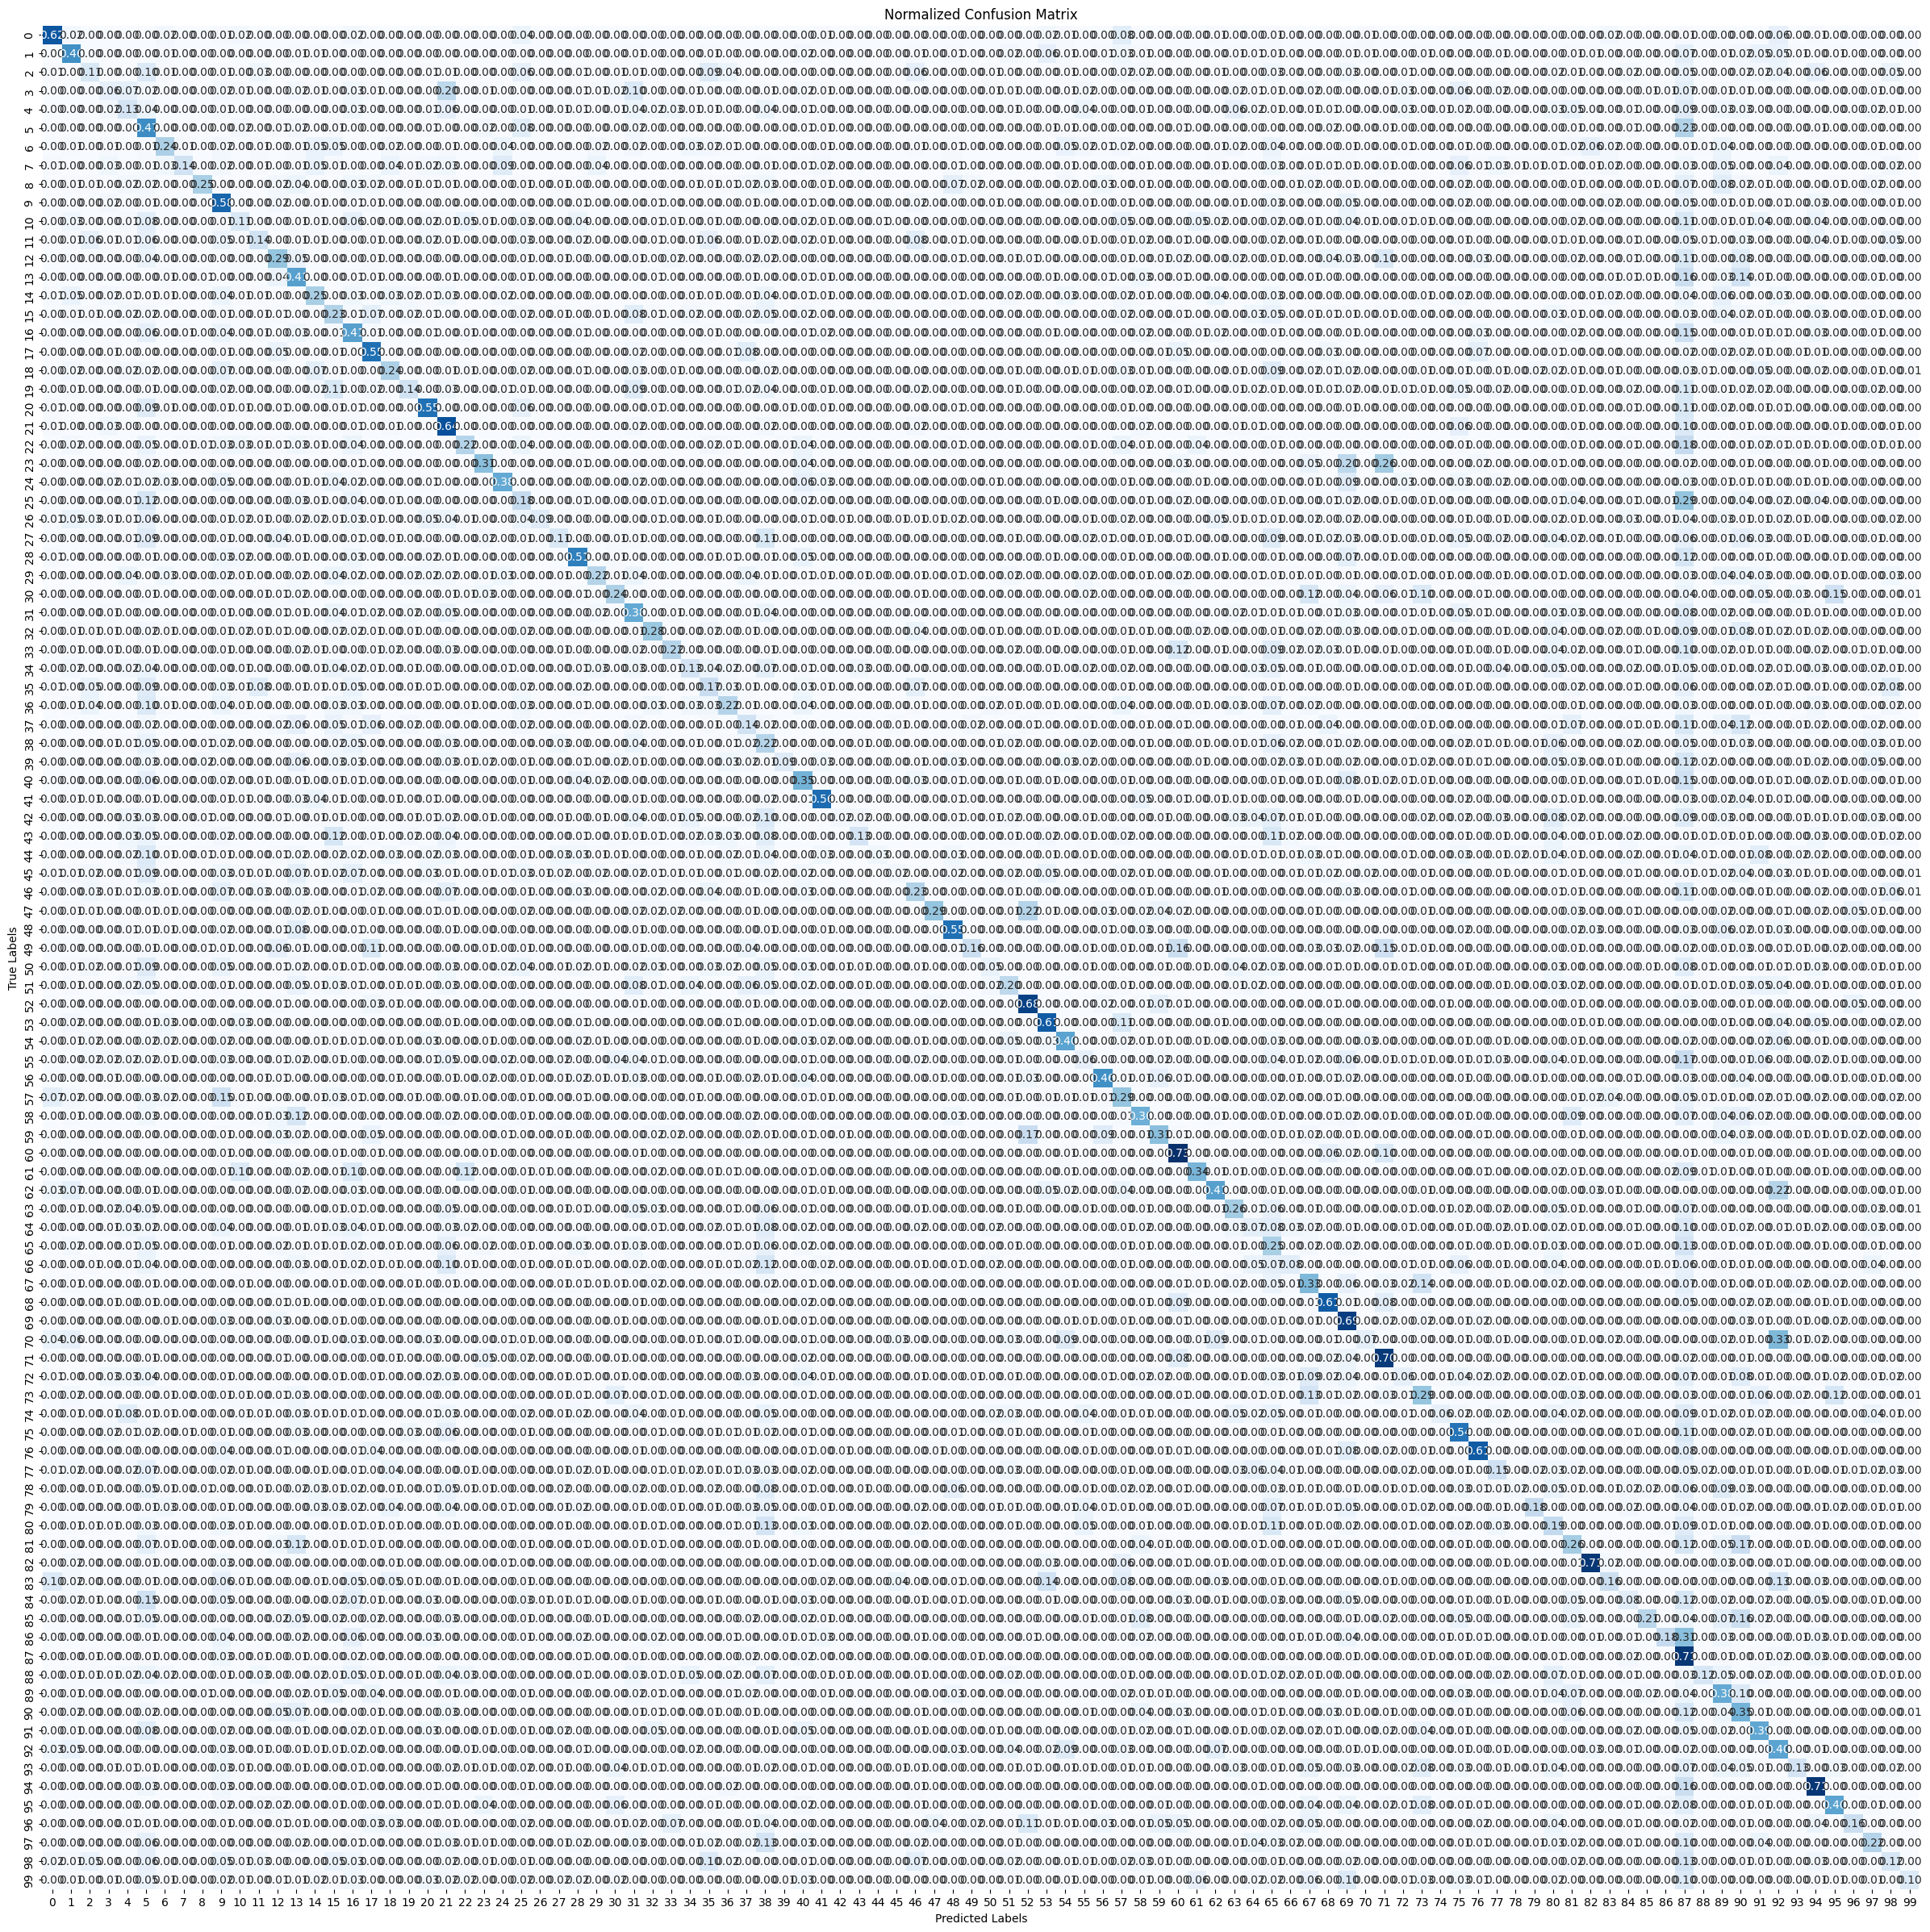

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model3.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Normalizar la matriz de confusión para mostrar porcentajes
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(30, 30))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()



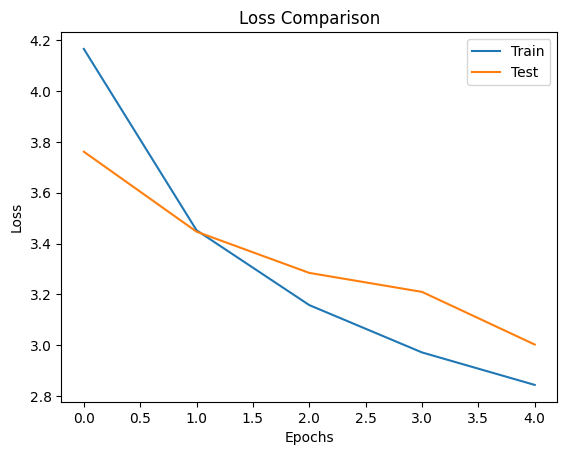

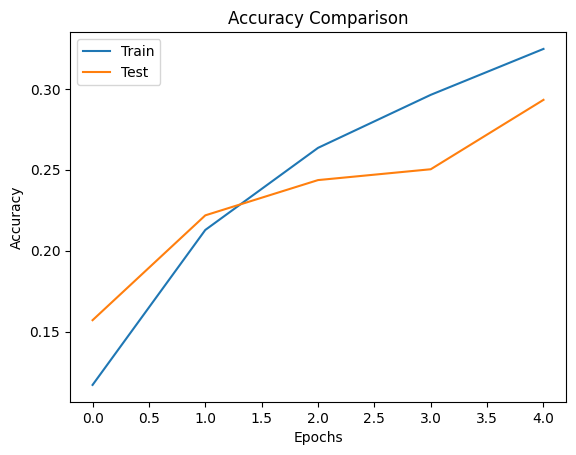

In [25]:
import matplotlib.pyplot as plt

# Graficar pérdida
plt.plot(history_model3.history['loss'], label='Train')
plt.plot(history_model3.history['val_loss'], label='Test')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Graficar precisión
plt.plot(history_model3.history['accuracy'], label='Train')
plt.plot(history_model3.history['val_accuracy'], label='Test')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **4º Modelo Mejorado**


En este modelo vamos aumentar los datos para ayudar a la generalización del modelo. Este aumento de datos podemos conseguirlo cambiando las imagenes que ya tenemos y utlizarlas en el entrenamiento.

Para ello emplearemos un generador de aumento de datos para un modelo de redes neuronales convolucionales, que es una técnica utilizada para aumentar la variabilidad de los datos de entrenamiento sin necesidad de adquirir más datos reales. Esto se logra aplicando transformaciones aleatorias a las imágenes existentes, lo que ayuda al modelo a generalizar mejor y a evitar el sobreajuste. En el código que has proporcionado, se definen varias transformaciones para aplicar a las imágenes antes de alimentarlas al modelo.

Los parametros de ImageDataGenerator funcionan de la siguiente manera:

**rotation_range:** Define el rango de ángulos en grados para una rotación aleatoria de las imágenes.


**width_shift_range y height_shift_range**: Especifican la fracción del total de ancho y alto por la cual se puede desplazar la imagen horizontal y verticalmente, respectivamente.


**zoom_range**: Controla el rango de zoom aleatorio que se puede aplicar a las imágenes.


**horizontal_flip y vertical_flip**: Permiten voltear aleatoriamente las imágenes horizontal y verticalmente, respectivamente.


**fill_mode**: Es el modo utilizado para rellenar los píxeles nuevos que se puedan crear después de aplicar transformaciones como el desplazamiento o la rotación. En este caso, se utiliza 'nearest', lo que significa que se rellenarán con el valor del píxel más cercano.

Gracias a este generador lograremos que el modelo este expuesto a nuevos lotes de imagenes durante el entrenamiento; mejorando así su capacidad para reconocer patrones y características importantes.

Primero, definimos la forma de nuestras nuevas imgenes y después definimos nuestro nuevo modelo.

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Crear un generador de aumento de datos
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Definir el modelo
model4 = Sequential()

model4.add(Conv2D(64, (3, 3), strides=(2, 2), activation='relu', input_shape=(32, 32, 3)))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))

model4.add(Conv2D(128, (3, 3), strides=(2, 2), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))

model4.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))

model4.add(Flatten())
model4.add(BatchNormalization())
model4.add(Dropout(0.3))
model4.add(Dense(512, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))
model4.add(Dense(100, activation='softmax'))
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 15, 15, 64)        1792      
                                                                 
 batch_normalization_9 (Bat  (None, 15, 15, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 batch_normalization_10 (Ba  (None, 4, 4, 128)         512       
 tchNormalization)                                               
                                                      

Como se puede apreciar, hemos aumentado enormemente el número de capas.

Por un lado hemos agregado una red convolucional con un número muy grande de neuronas y por otro hemos agregado también otra red densa para compensar el aumento de neuronas convolucionales.

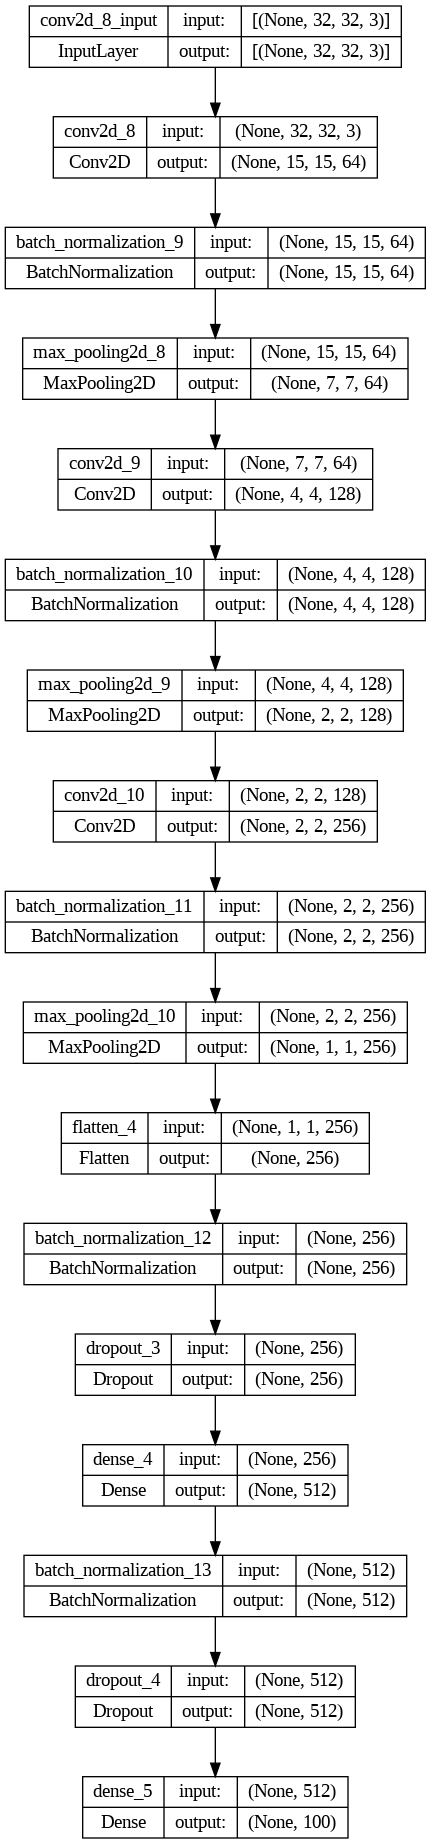

In [27]:
plot_model(model4, to_file='model4_architecture.png', show_shapes=True, show_layer_names=True)

Ahora entrenamos nuestro modelo.

Otra de las novedades que hemos introducido en eete modelo que no estaba presente en los anteriores es el ajuste dinámico de la tasa de aprendizaje durante el entrenamiento. Esto lo haremos creando un objeto de la clase `ReduceLROnPlateau`.


A continuación detallaremos como funcionan los parámetros del objeto `ReduceLROnPlateau`:

- `monitor='val_loss'`: Indica la métrica que se va a monitorear para decidir si se debe reducir la tasa de aprendizaje. En este caso, se está monitoreando la pérdida (loss) en el conjunto de validación (`'val_loss'`). El ajuste de la tasa de aprendizaje se realizará en función de cómo cambie esta métrica.

- `factor=0.2`: Es el factor por el cual se va a reducir la tasa de aprendizaje. Cuando se activa el ajuste de la tasa de aprendizaje, esta se reducirá multiplicándola por este factor. Por ejemplo, si la tasa de aprendizaje actual es 0.1, se reducirá a 0.1 * 0.2 = 0.02.

- `patience=5`: Es el número de épocas sin mejoras después del cual se activará el ajuste de la tasa de aprendizaje. Si durante 5 épocas (en este caso) no hay una mejora en la métrica monitoreada (en `val_loss`), se reducirá la tasa de aprendizaje.

- `min_lr=0.0001`: Es el límite inferior para la tasa de aprendizaje. Asegura que la tasa de aprendizaje no se reduzca por debajo de este valor.

En resumen, el `ReduceLROnPlateau` monitorea la métrica de pérdida en el conjunto de validación (`val_loss`). Si no hay mejoras en esta métrica después de un número específico de épocas (determinado por `patience`), la tasa de aprendizaje se reduce en un factor específico (`factor`). Esto ayuda a ajustar la tasa de aprendizaje dinámicamente durante el entrenamiento para mejorar la convergencia y evitar estancamientos en el proceso de aprendizaje del modelo.

También sustituiremos el optimizador. En los modelos anteriores estabamos empleando el optimizador "SGD" y para este usaremos "Adam".

Tras realizar pruebas con ambos optimizadores, obtenemos mejor rendimiento con "Adam" debido, seguramente, a su capacidad para adaptar dinámicamente la tasa de aprendizaje para cada parámetro del modelo, lo que puede conducir a convergencia más rápida.

Es decir, que la configuración específica que hemos empleado con la tasa de aprendizaje reducible funciona muy bien con la capacidad adaptativa de "Adam" para ajustar dicha tasa de aprendizaje.

In [28]:
# Entrenar el modelo con el optimizador Adam y una tasa de aprendizaje reducible
model4.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Definir un plan de reducción de la tasa de aprendizaje
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Entrenar el modelo con aumento de datos
history_model4 = model4.fit(datagen.flow(train_images, train_labels, batch_size=128),
                    steps_per_epoch=len(train_images) / 128,  # Asegurar que cada imagen se procese una vez por época
                    epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[reduce_lr],
                    verbose=1)

Epoch 1/50
390/390 [==============================] - 102s 251ms/step - loss: 4.1692 - accuracy: 0.0901 - val_loss: 4.5675 - val_accuracy: 0.0321 - lr: 0.0010
Epoch 2/50
390/390 [==============================] - 111s 284ms/step - loss: 3.6015 - accuracy: 0.1513 - val_loss: 3.9396 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 3/50
390/390 [==============================] - 98s 251ms/step - loss: 3.3515 - accuracy: 0.1906 - val_loss: 3.2568 - val_accuracy: 0.2185 - lr: 0.0010
Epoch 4/50
390/390 [==============================] - 97s 248ms/step - loss: 3.1932 - accuracy: 0.2158 - val_loss: 3.0212 - val_accuracy: 0.2586 - lr: 0.0010
Epoch 5/50
390/390 [==============================] - 96s 246ms/step - loss: 3.0720 - accuracy: 0.2374 - val_loss: 3.2682 - val_accuracy: 0.2226 - lr: 0.0010
Epoch 6/50
390/390 [==============================] - 97s 249ms/step - loss: 2.9862 - accuracy: 0.2538 - val_loss: 2.9772 - val_accuracy: 0.2642 - lr: 0.0010
Epoch 7/50
390/390 [==============================

In [29]:
# Evaluar el modelo
score, accuracy = model4.evaluate(test_images, test_labels)
print('Precisión en la prueba:', accuracy)

313/313 [==============================] - 3s 10ms/step - loss: 2.0659 - accuracy: 0.4459
Precisión en la prueba: 0.44589999318122864


Hasta el momento, es la mejor precisión de los modelos que hemos realizado; llegando a obtener un 0.4458, es decir, que predice el 44,58% de las imagenes bien.

Durante el entrenamiento se puede apreciar que la tasa de aprendizaje reducible ha sido un factor determinante para mejorar el modelo, pues en el history se ve que después de cada reducción de la tasa de aprendizaje, "val_accuracy" mejora sus valores promedio.

Cabe destacar que la precisión que alcanza nuestro modelo requiere de un número considerable de "epochs"(50) y tiempo de ejecución; por lo que tampoco es muy eficiente.

A continuación mostraremos gráficas comparativas de perdida y precisión entre los distintos modelos para ver si hay una mejora real y las diferencias que aparecen en el entrenamiento

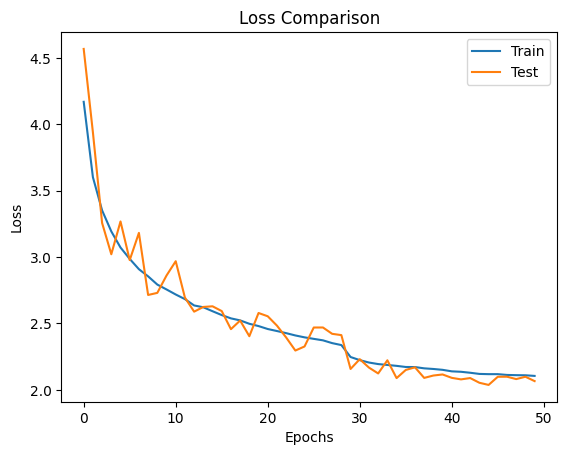

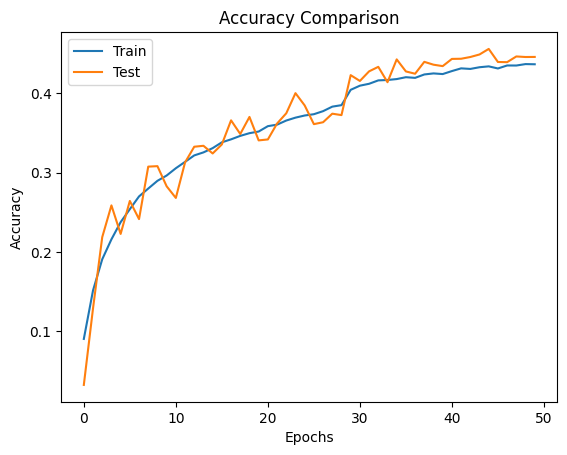

In [30]:
import matplotlib.pyplot as plt

# Graficar pérdida
plt.plot(history_model4.history['loss'], label='Train')
plt.plot(history_model4.history['val_loss'], label='Test')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Graficar precisión
plt.plot(history_model4.history['accuracy'], label='Train')
plt.plot(history_model4.history['val_accuracy'], label='Test')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()